In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score


In [2]:
train =pd.read_csv("C:\\Users\\JOTHISH N\\Desktop\\DS\\SVM\\SalaryData_Train(1).csv")

In [3]:
test = pd.read_csv("C:\\Users\\JOTHISH N\\Desktop\\DS\\SVM\\SalaryData_Test(1).csv")

# Data preprocessing

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5222 entries, 0 to 5221
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5222 non-null   int64  
 1   workclass      5222 non-null   object 
 2   education      5222 non-null   object 
 3   educationno    5221 non-null   float64
 4   maritalstatus  5221 non-null   object 
 5   occupation     5221 non-null   object 
 6   relationship   5221 non-null   object 
 7   race           5221 non-null   object 
 8   sex            5221 non-null   object 
 9   capitalgain    5221 non-null   float64
 10  capitalloss    5221 non-null   float64
 11  hoursperweek   5221 non-null   float64
 12  native         5221 non-null   object 
 13  Salary         5221 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 571.3+ KB


In [5]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,5222.000000,5221.000000,5221.000000,5221.000000,5221.000000
mean,38.505745,10.138288,1066.501628,94.831641,41.105727
std,13.093094,2.526266,7301.579293,413.061600,11.657399
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2547.000000,99.000000


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [8]:
train[train.duplicated()].shape

(125, 14)

In [9]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
364,27,Private,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
518,24,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
525,24,Private,HS-grad,9.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
619,33,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,44,Private,HS-grad,9.0,Married-civ-spouse,Tech-support,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
5141,39,Self-emp-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
5159,54,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
5170,19,Private,Some-college,10.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [10]:
Train = train.drop_duplicates()

In [11]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217,45,Private,11th,7.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
5218,59,Private,Bachelors,13.0,Divorced,Exec-managerial,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
5219,31,Private,HS-grad,9.0,Never-married,Other-service,Own-child,White,Female,0.0,0.0,35.0,United-States,<=50K
5220,40,Private,HS-grad,9.0,Separated,Adm-clerical,Unmarried,White,Female,0.0,0.0,37.0,United-States,<=50K


In [12]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [13]:
Test=test.drop_duplicates()
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [14]:
Train['Salary'].value_counts()

 <=50K    3802
 >50K     1294
Name: Salary, dtype: int64

In [15]:
Test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

# Visualization

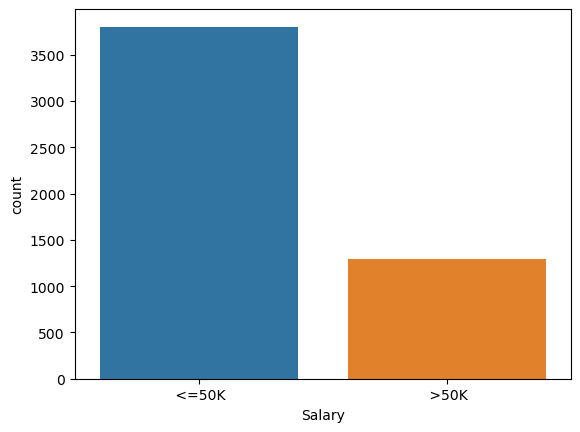

 <=50K    3802
 >50K     1294
Name: Salary, dtype: int64

In [16]:
sns.countplot(x='Salary',data= Train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

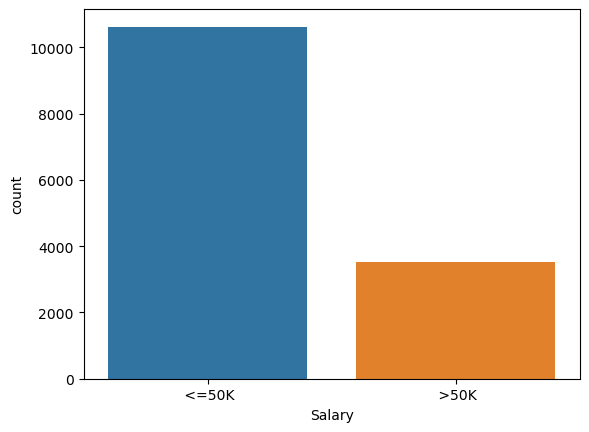

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [17]:
sns.countplot(x='Salary',data= Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Test['Salary'].value_counts()

<AxesSubplot:xlabel='occupation', ylabel='workclass'>

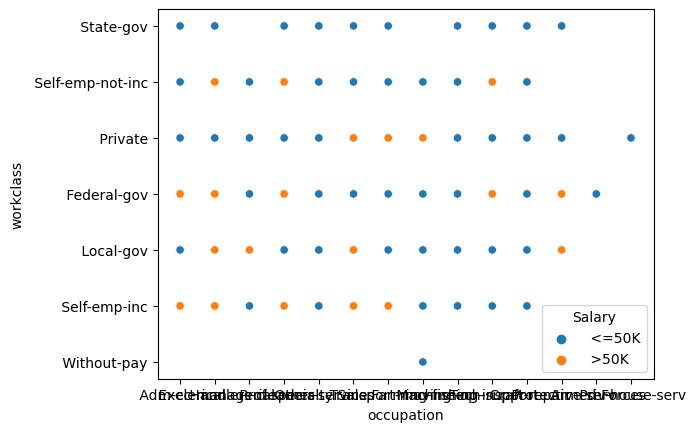

In [18]:
sns.scatterplot(Train['occupation'],Train['workclass'],hue=Train['Salary'])


<AxesSubplot:xlabel='education'>

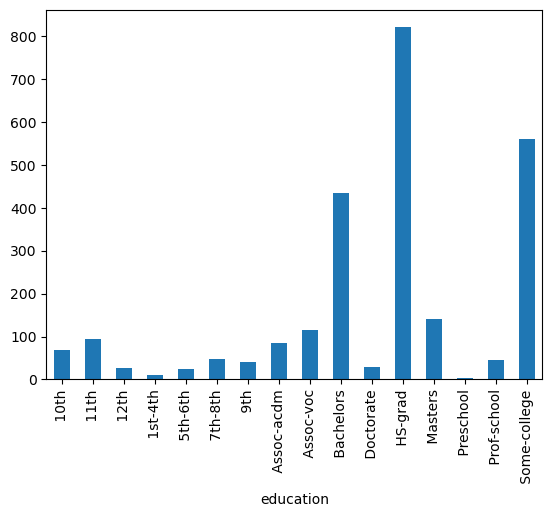

In [19]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')


<AxesSubplot:xlabel='occupation'>

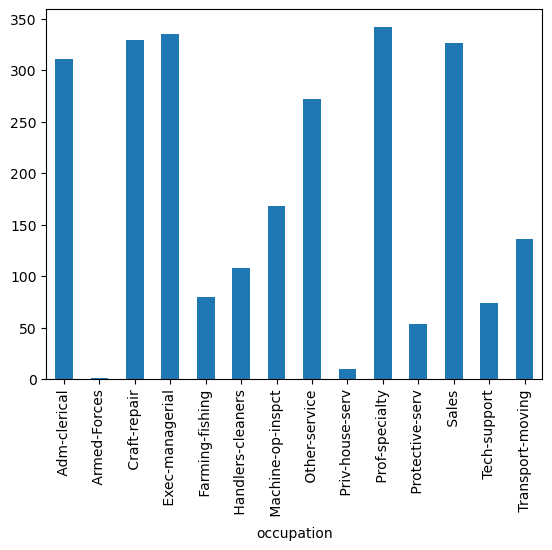

In [20]:
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')


<AxesSubplot:xlabel='workclass'>

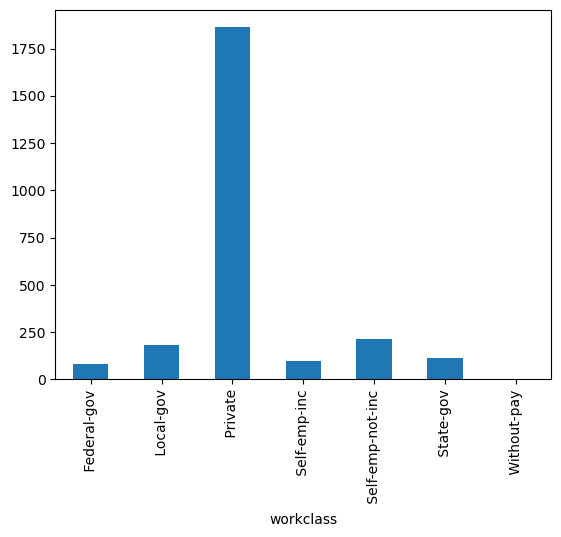

In [21]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')


<AxesSubplot:xlabel='sex'>

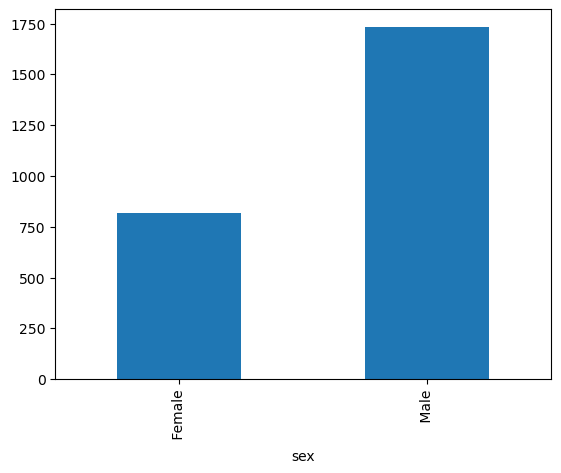

In [22]:
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')


<AxesSubplot:xlabel='relationship'>

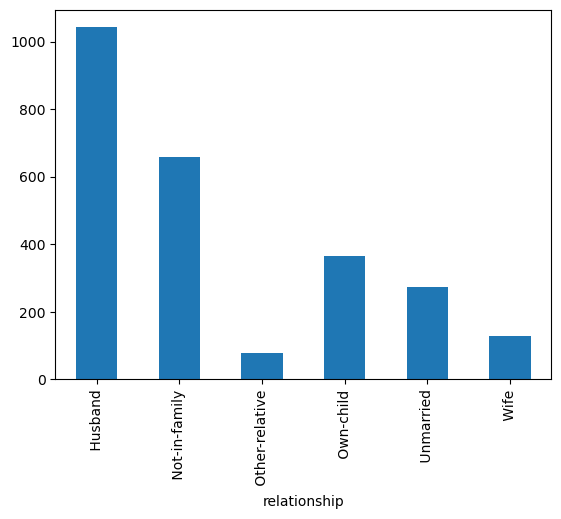

In [23]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')


In [24]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]


In [25]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

In [26]:
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,36,<=50K
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,36,<=50K
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,36,<=50K
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,36,<=50K
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,<=50K


In [27]:
##Capturing the column names which can help in futher process
colnames = Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [28]:
# storing the values in x_train,y_train,x_test & y_test for spliting the data in train and test for analysis
x_train = Train[colnames[0:13]].values
y_train = Train[colnames[13]].values
x_test = Test[colnames[0:13]].values
y_test = Test[colnames[13]].values

In [29]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
x_train = norm_func(x_train)
x_train

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [33]:
x_test = norm_func(x_test)
x_test

array([[2.500025e-04, 2.000020e-05, 1.000010e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [3.800038e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        5.000050e-04, 3.700037e-04],
       [2.800028e-04, 1.000010e-05, 7.000070e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       ...,
       [3.800038e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        5.000050e-04, 3.700037e-04],
       [4.400044e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [3.500035e-04, 3.000030e-05, 9.000090e-05, ..., 0.000000e+00,
        6.000060e-04, 3.700037e-04]])

# Support vector Machine

In [32]:
# SVM Classification
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

In [ ]:
pred_test_linear = model_linear.predict(x_test)


In [ ]:
np.mean(pred_test_linear==y_test)

In [ ]:
# Kernel = poly
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

In [ ]:
np.mean(pred_test_poly==y_test)


In [ ]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

In [ ]:
np.mean(pred_test_rbf==y_test)

In [ ]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)

In [ ]:
np.mean(pred_test_sig==y_test)